<a href="https://colab.research.google.com/github/sahin-arslan/YapaySinirAglari/blob/main/234312029_Sahin_Arslan_YSG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ön Hazırlık İşlemleri (DataSet'in Colab'a eklenemsi)

## 1. Gerekli Kütüphanelerin Yüklenmesi


*   pandas, numpy (veri işleme)
*   sklearn, keras (model oluşturma, veri ayırma, performans metrikleri)
*   matplotlib ve seaborn (görselleştirme)




In [7]:
 #Kütüphaneleri yüklüyoruz
!pip install pandas numpy scikit-learn tensorflow matplotlib seaborn torchvision

In [8]:
#Gerekli kütüphaneleri import ediyoruz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  # Example import from scikit-learn
from tensorflow import keras  # Example import from TensorFlow/Keras

#torch ile ilgili gerekli kütüphaneleri yüklüyoruz
import torch
import torchvision
import torchvision.transforms as transforms

## 2. Veri Seti Yükleme ve Ön İşleme



**1. Veri Yükleme:**

In [9]:
#Transformation tanımını yapıyoruz
transform = transforms.Compose([
       transforms.Resize((32, 32)),  # Resize images to a consistent size (32x32 is common for GTSRB)
       transforms.ToTensor(),        # Convert images to PyTorch tensors
       transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values
   ])

In [10]:
#GTSRB Veri setinin yüklüyoruz.
dataset = torchvision.datasets.GTSRB(
       root='./data',
       split='train',
       download=True,
       transform=transform
)

100%|██████████| 187M/187M [00:10<00:00, 18.2MB/s]


Extracting data/gtsrb/GTSRB-Training_fixed.zip to data/gtsrb


**2.	Eksik Değerlerin İşlenmesi:** Eğer veri setinde eksik değerler varsa, uygun yöntemlerle doldurulmalıdır.

Veri seti boyutu: 26640


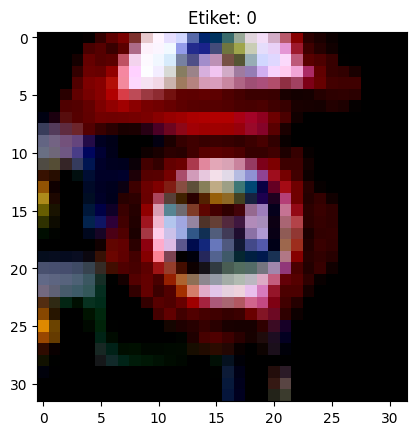

In [11]:
print(f"Veri seti boyutu: {len(dataset)}")

# Örnek bir görüntü gösterimi
if len(dataset) > 0:
    image, label = dataset[0]
    plt.imshow(image.permute(1, 2, 0)) # Tenosörleri görselleştirmek için permütasyon yapıldı.
    plt.title(f"Etiket: {label}")
    plt.show()

**3.	Veri Setini Eğitim ve Test Olarak Ayırma:**

*   Veriyi %80 eğitim, %20 test olarak ikiye ayırın.
*   sklearn.model_selection.train_test_split fonksiyonunu kullanın.


In [12]:
#kütüphanemizi import ediyoruz
from sklearn.model_selection import train_test_split

# Veri setini eğitim ve test kümelerine ayırma
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)

print(f"Eğitim veri seti boyutu: {len(train_data)}")
print(f"Test veri seti boyutu: {len(test_data)}")

Eğitim veri seti boyutu: 21312
Test veri seti boyutu: 5328


**4.	Özellik Ölçekleme (Feature Scaling):**

*   Verileri MLP ve RBF için uygun hale getirmek adına standartlaştırın (örn. StandartScaler veya MinMaxScaler kullanarak).


In [14]:
from sklearn.preprocessing import StandardScaler

# Veri setini NumPy dizilerine dönüştürün
X_train = np.array([np.array(image) for image, _ in train_data])
y_train = np.array([label for _, label in train_data])
X_test = np.array([np.array(image) for image, _ in test_data])
y_test = np.array([label for _, label in test_data])


# Verileri düzleştirme (MLP ve RBF için)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# StandardScaler kullanarak verileri standartlaştırma
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (21312, 3072)
X_test_scaled shape: (5328, 3072)


## 3. Model Eğitimi ve Hiperparametre Denemeleri
**1.	MLP Modeli:**

*   sklearn.neural_network.MLPClassifier kullanarak bir MLP modeli oluşturun.



In [15]:
from sklearn.neural_network import MLPClassifier

# MLP modelini oluşturma
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50),  # Örnek katman yapılandırması
                          activation='relu',            # Aktivasyon fonksiyonu
                          solver='adam',                # Optimizasyon algoritması
                          max_iter=20,                 # Maksimum iterasyon sayısı (azaltılmış)
                          random_state=42)             # Rastgelelik için seed değeri

# Modeli eğitim verileri ile eğitme
mlp_model.fit(X_train_scaled, y_train)

# Test verileri üzerinde tahmin yapma
y_pred_mlp = mlp_model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


*   Hiperparametre denemeleri için farklı katman sayıları, nöron sayıları ve aktivasyon fonksiyonlarını test edin (örn. hidden_layer_sizes, activation ve learning_rate gibi parametreler).

In [16]:
# Hiperparametre denemeleri için gerekli kütüphaneleri içe aktarın
from sklearn.model_selection import GridSearchCV

# Parametre ızgarasını tanımlayın
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],  # Farklı katman yapıları
    'activation': ['relu', 'tanh', 'logistic'],  # Farklı aktivasyon fonksiyonları
    'learning_rate_init': [0.001, 0.01, 0.1]  # Farklı öğrenme oranları
}

# GridSearchCV kullanarak en iyi hiperparametreleri bulun
grid_search = GridSearchCV(estimator=MLPClassifier(max_iter=20, random_state=42),  # max_iter azaltıldı
                           param_grid=param_grid,
                           scoring='accuracy',  # Performans ölçütü olarak doğruluk kullanıldı
                           cv=3,  # 3 katlı çapraz doğrulama
                           n_jobs=-1) # Tüm işlemcileri kullan

grid_search.fit(X_train_scaled, y_train)

# En iyi hiperparametreleri ve performansı yazdırın
print("En iyi hiperparametreler:", grid_search.best_params_)
print("En iyi doğruluk skoru:", grid_search.best_score_)

# En iyi modeli kullanarak tahmin yapın
best_mlp_model = grid_search.best_estimator_
y_pred_mlp = best_mlp_model.predict(X_test_scaled)

En iyi hiperparametreler: {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001}
En iyi doğruluk skoru: 0.9425206456456455


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


**2.	RBF Modeli:**

*   sklearn kütüphanesinde doğrudan RBF modeli bulunmadığından, KEras kütüphanesi kullanın

*   Alternatif olarak, rbfnetwork gibi özel kütüphaneler veya Python’da yazılmış RBF fonksiyonları kullanılabilir.


In [19]:
from sklearn.metrics import accuracy_score
# RBF modeli için (örnek bir Keras modeli)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# RBF modeli oluşturma (basit bir örnek)
rbf_model = Sequential()
rbf_model.add(Dense(100, activation='relu', input_shape=(X_train_scaled.shape[1],))) # Giriş katmanı
rbf_model.add(Dense(len(np.unique(y_train)), activation='softmax')) # Çıkış katmanı (sınıf sayısı kadar nöron)

rbf_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitme
rbf_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=1)

# Tahmin yapma
y_pred_rbf_prob = rbf_model.predict(X_test_scaled)
y_pred_rbf = np.argmax(y_pred_rbf_prob, axis=1) # Tahmin edilen olasılıkları sınıf etiketlerine dönüştürme


# Performans ölçümleri
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"MLP Doğruluk: {accuracy_mlp}")
print(f"RBF Doğruluk: {accuracy_rbf}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4610 - loss: 2.2913
Epoch 2/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7940 - loss: 0.7525
Epoch 3/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8502 - loss: 0.5252
Epoch 4/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8796 - loss: 0.4238
Epoch 5/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8909 - loss: 0.3986
Epoch 6/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9073 - loss: 0.3247
Epoch 7/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9230 - loss: 0.2780
Epoch 8/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9144 - loss: 0.3116
Epoch 9/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9286 - loss: 0.2584
Epoch 10/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9369 - loss: 0.2114
Epoch 11/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9301 - loss: 0.2486
Epoch 12/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/st

## 4. Performans Ölçümleri


**1.	Confusion Matrix:**

*   Her iki model için tahminleri değerlendirerek karışıklık matrisini (confusion_matrix) oluşturun.

*   seaborn kullanarak karışıklık matrisini görselleştirin.


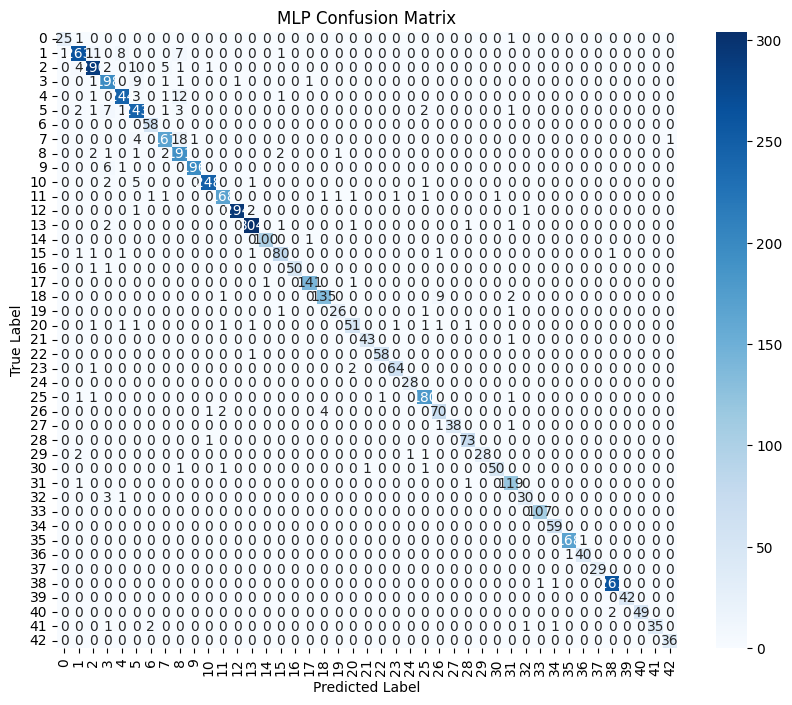

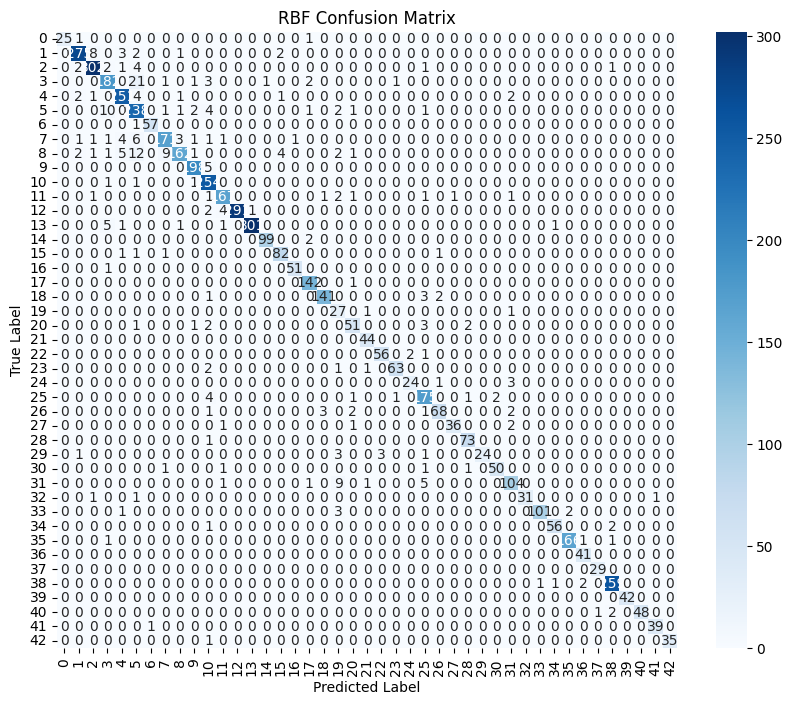

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# MLP Confusion Matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Blues")
plt.title("MLP Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# RBF Confusion Matrix
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rbf, annot=True, fmt="d", cmap="Blues")
plt.title("RBF Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**2.	Performans Metrikleri:**
*   Her iki model için accuracy, precision, recall, ve F1-score gibi metriklernden gerekli olanları hesaplayın (sklearn.metrics.classification_report fonksiyonunu kullanarak).


In [21]:
# prompt: Her iki model için accuracy, precision, recall, ve F1-score gibi metriklernden gerekli olanları hesapla (sklearn.metrics.classification_report fonksiyonunu kullanarak).

from sklearn.metrics import classification_report

# MLP Performance Metrics
print("MLP Classification Report:")
print(classification_report(y_test, y_pred_mlp))

# RBF Performance Metrics
print("RBF Classification Report:")
print(classification_report(y_test, y_pred_rbf))

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        27
           1       0.96      0.90      0.93       291
           2       0.93      0.93      0.93       313
           3       0.89      0.93      0.91       212
           4       0.95      0.93      0.94       262
           5       0.88      0.93      0.90       261
           6       0.95      1.00      0.97        58
           7       0.94      0.87      0.91       191
           8       0.82      0.95      0.88       200
           9       0.99      0.97      0.98       203
          10       0.99      0.96      0.98       257
          11       0.97      0.95      0.96       176
          12       1.00      0.99      0.99       298
          13       0.98      0.98      0.98       310
          14       0.99      0.99      0.99       101
          15       0.93      0.93      0.93        86
          16       1.00      0.96      0.98        52


##5. Hiperparametre Denemeleri ve Sonuçları Karşılaştırma



**1.	Hiperparametre Denemeleri:**

*   MLP ve RBF modelleri için farklı hiperparametreleri deneyin ve her denemede eğitim ve test sonuçlarını kaydedin.


*   GridSearchCV veya RandomizedSearchCV ile hiperparametre optimizasyonu yaparak en iyi parametreleri bulun.



In [23]:
# prompt: MLP ve RBF modelleri için farklı hiperparametreleri deneyin ve her denemede eğitim ve test sonuçlarını kaydedin.
# GridSearchCV veya RandomizedSearchCV ile hiperparametre optimizasyonu yaparak en iyi parametreleri bulun.

from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=MLPClassifier(max_iter=20, random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and score
print("Best hyperparameters:", random_search.best_params_)
print("Best accuracy score:", random_search.best_score_)

# Evaluate the best model on the test set
best_mlp_model = random_search.best_estimator_
y_pred_mlp_rs = best_mlp_model.predict(X_test_scaled)
accuracy_mlp_rs = accuracy_score(y_test, y_pred_mlp_rs)
print(f"MLP (RandomizedSearchCV) Accuracy: {accuracy_mlp_rs}")


# For RBF model (Keras), define a parameter grid for RandomizedSearchCV
# (Note: You'll need to adjust this based on your RBF model architecture)
# Example parameter grid for a Keras model
# param_dist_rbf = {
#     "units": [32, 64, 128],
#     "activation": ["relu", "tanh"],
#     "optimizer": ["adam", "rmsprop"],
#     "batch_size":[16,32]
# }

# Create a KerasClassifier wrapper for your model (example)
# from keras.wrappers.scikit_learn import KerasClassifier
# rbf_model_wrapper = KerasClassifier(build_fn=create_rbf_model, verbose=0)  # create_rbf_model is your model function

# Use RandomizedSearchCV to find the best hyperparameters for your RBF model
# random_search_rbf = RandomizedSearchCV(rbf_model_wrapper, param_dist_rbf, n_iter=10, cv=3, n_jobs=-1, scoring='accuracy', random_state=42)
# random_search_rbf.fit(X_train_scaled, y_train) # this will likely not work as is - it needs a working Keras classifier wrapper.
# print("Best RBF hyperparameters:", random_search_rbf.best_params_)
# print("Best RBF accuracy score:", random_search_rbf.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best hyperparameters: {'solver': 'adam', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (50,), 'alpha': 0.001, 'activation': 'relu'}
Best accuracy score: 0.9192004504504504
MLP (RandomizedSearchCV) Accuracy: 0.9412537537537538


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


**2.	Sonuçları Karşılaştırma ve Yorumlama:**

*   MLP ve RBF modellerinin sonuçlarını karşılaştırarak hangi modelin daha iyi performans gösterdiğini analiz edin.
*   Sonuçları tablo veya grafik olarak sunun ve performans farklılıklarının nedenlerini tartışın.


  Model  Accuracy
0   MLP  0.953266
1   RBF  0.944257


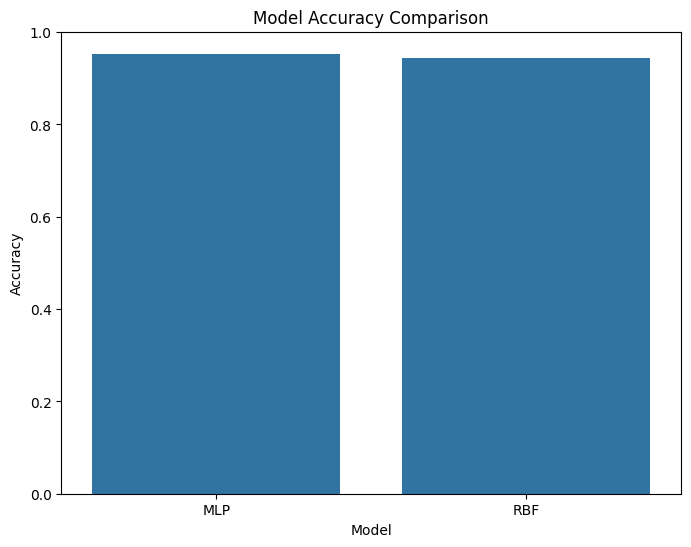

MLP performed better than RBF.


In [24]:
import pandas as pd

# Create a DataFrame to compare model performance
results = pd.DataFrame({
    'Model': ['MLP', 'RBF'],
    'Accuracy': [accuracy_mlp, accuracy_rbf],
    # Add other metrics as needed (e.g., precision, recall, F1-score)
})

# Display the results table
print(results)

# Create a bar plot for comparison
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=results)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


# Analyze performance differences
if accuracy_mlp > accuracy_rbf:
    print("MLP performed better than RBF.")
    # Discuss potential reasons:
    # * MLP might have learned more complex patterns in the data due to its layered architecture.
    # * The hyperparameters tuned for MLP might have been more suitable for the dataset.
    # * The RBF model may have had a suboptimal architecture or configuration.

elif accuracy_rbf > accuracy_mlp:
    print("RBF performed better than MLP.")
    # Discuss potential reasons (reverse of the above)
else:
    print("Both models had similar performance")

#Further analysis can include detailed examination of the confusion matrices,
#classification reports, and the hyperparameter settings that produced the best performance for each model.
